In [1]:
import numpy as np
import pandas as pd

In [3]:
import os

base_path = r"C:\Users\thaip\Desktop\Exercise 8\data\news_1135"

all_texts = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".txt"):  # chỉ đọc file .txt
            file_path = os.path.join(root, file)
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                content = f.read()
                all_texts.append({
                    "category": os.path.basename(root),  # tên thư mục cha (vd: Thể thao)
                    "filename": file,
                    "content": content
                })

print(f"Đã đọc {len(all_texts)} file văn bản.")
print("Ví dụ 1 file đầu tiên:\n")
print("Thể loại:", all_texts[0]["category"])
print("tên file:", all_texts[0]["filename"])
print("Nội dung:\n", all_texts[0]["content"][:500], "...")

Đã đọc 224 file văn bản.
Ví dụ 1 file đầu tiên:

Thể loại: Sức khỏe
tên file: 065cce8fbcdcb7df6941f23f515874f868ed501a.txt
Nội dung:
 Bình_thường tôi không sao , nhưng vào mùa_đông , sau khi tắm , lau khô người , mặc quần_áo là ngứa khắp người khoảng 5 phút , nhưng không có hiện_tượng đỏ hay nổi mẩn . Bình_thường tôi không sao , nhưng vào mùa_đông , sau khi tắm , lau khô người , mặc quần_áo là ngứa khắp người khoảng 5 phút , nhưng không có hiện_tượng đỏ hay nổi mẩn . Xin hỏi , hiện_tượng đó là gì , điều_trị thế_nào ? Nguồn nước nhà_tôi không bị ô_nhiễm . Trần Văn Đan ( Nghệ_An ) Ngứa da thường hay xảy_ra khi da bị khô và tróc  ...


In [4]:
import pandas as pd
df = pd.DataFrame(all_texts)
df.to_csv("all_news.csv", index=False, encoding="utf-8-sig")

In [5]:
df.head()

,category,filename,content
0,Sức khỏe,065cce8fbcdcb7df6941f23f515874f868ed501a.txt,"Bình_thường tôi không sao , nhưng vào mùa_đông..."
1,Sức khỏe,0748735478fff881281d124207782e3ee26aa3ca.txt,"Dân_trí Đôi_khi , dù có xỏ bao_nhiêu đôi tất ,..."
2,Sức khỏe,078192445fcfa9f6ad7966d9bb096d4538ca3e27.txt,Dân_trí Dưới_đây là những lời_khuyên của các b...
3,Sức khỏe,0c793f78b653ec265aa155f662a24ced5df9102b.txt,"Dân_trí Sau khi được Bộ Y_tế cấp phép , hệ_thố..."
4,Sức khỏe,0d20684ca0b0bbfdd2acf2c9afaceb0b0fb76706.txt,Dân_trí Liên_quan đến vụ bé gái 7 tuổi tử_vong...


In [6]:
df['category'].value_counts()


category
Thể thao    140
Sức khỏe     70
Thời sự      14
Name: count, dtype: int64

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from tqdm import tqdm
from sklearn.datasets import load_files
from pyvi import ViTokenizer
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [9]:
from pyvi import ViTokenizer

In [10]:
df1 = df.drop(columns = ["filename"])
df1.head()

,category,content
0,Sức khỏe,"Bình_thường tôi không sao , nhưng vào mùa_đông..."
1,Sức khỏe,"Dân_trí Đôi_khi , dù có xỏ bao_nhiêu đôi tất ,..."
2,Sức khỏe,Dân_trí Dưới_đây là những lời_khuyên của các b...
3,Sức khỏe,"Dân_trí Sau khi được Bộ Y_tế cấp phép , hệ_thố..."
4,Sức khỏe,Dân_trí Liên_quan đến vụ bé gái 7 tuổi tử_vong...


In [11]:
with open("data/vietnamese-stopwords.txt", encoding="utf8") as f:
    stopwords = [x.strip().replace(" ", "_") for x in f.readlines()]

print("10 từ dừng đầu tiên:", stopwords[:10])

10 từ dừng đầu tiên: ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [10]:
from sklearn.svm import SVC
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [12]:
X = df["content"]
y = df["category"]

In [13]:
tfidf = TfidfTransformer()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df["content"], df["category"], test_size=0.2, random_state=30)
vectorizer = CountVectorizer(stop_words=stopwords)
tfidf = TfidfTransformer()
model_preprocess = Pipeline([
    ("vect", vectorizer),
    ("tfidf", tfidf),
])

X_tfidf = model_preprocess.fit_transform(X_train)

print("Shape TF-IDF:", X_tfidf.shape)

vocab = model_preprocess.named_steps["vect"].vocabulary_

print("\n10 từ đầu tiên trong từ điển:")
for i, (k, v) in enumerate(list(vocab.items())[:10]):
    print(f"{i+1}: ({k}, {v})")

Shape TF-IDF: (179, 7025)

10 từ đầu tiên trong từ điển:
1: (dân_trí, 1688)
2: (tiết_lộ, 5416)
3: (trang, 5475)
4: (football, 1859)
5: (leaks, 2926)
6: (messi, 3314)
7: (ronaldo, 4540)
8: (cầu_thủ, 1474)
9: (lương, 3121)
10: (thế_giới, 5252)


In [15]:
tf_vec= X_tfidf.toarray()
tf_vec[:10]

array([[0.        , 0.31329257, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
model = SVC(kernel='linear', C=1)
model.fit(X_tfidf, y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def cross_validation(estimator, X_train, Y_train):
    train_sizes = [1.0]  
    _, train_scores, test_scores = learning_curve(
        estimator,
        X_train, Y_train,
        cv=10,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring="accuracy"
    )
    test_scores = test_scores[0]
    mean = test_scores.mean()
    std = test_scores.std()
    return mean, std


def plot(title, xlabel, X, Y, error, ylabel="Accuracy"):
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    plt.errorbar(X, Y, yerr=error, linestyle='None', marker='o')
    plt.show()


Đang chạy kernel = linear ...
Đang chạy kernel = poly ...
Đang chạy kernel = rbf ...
Đang chạy kernel = sigmoid ...


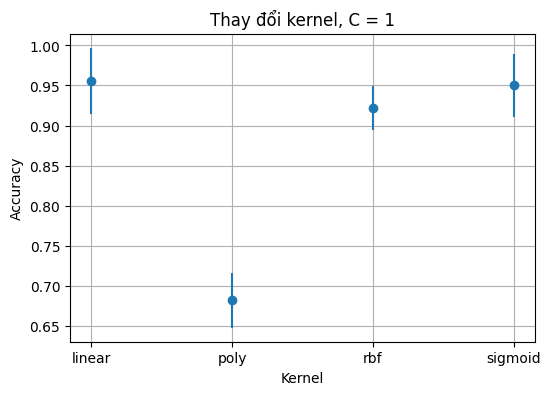

<Figure size 640x480 with 0 Axes>

In [22]:
title = "Thay đổi kernel, C = 1"
xlabel = "Kernel"
X = []
Y = []
error = []

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f"Đang chạy kernel = {kernel} ...")
    text_clf = svm.SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation(text_clf, X_tfidf, y_train)
    X.append(kernel)
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)

plt.savefig('svm_change_kernel.png', bbox_inches='tight')
plt.show()


Đang chạy C = 0.1 ...
Đang chạy C = 1.0 ...
Đang chạy C = 2.0 ...
Đang chạy C = 5.0 ...
Đang chạy C = 10.0 ...


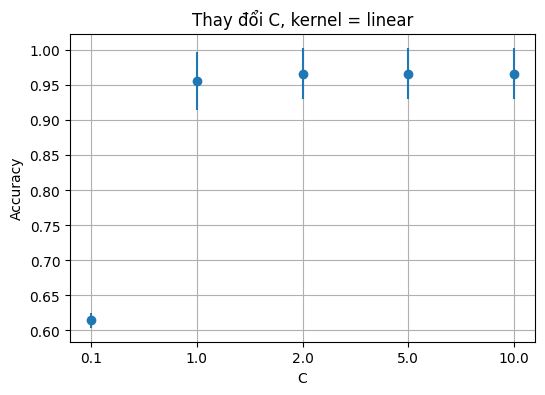

<Figure size 640x480 with 0 Axes>

In [25]:
title = "Thay đổi C, kernel = linear"
xlabel = "C"
X = []
Y = []
error = []

for C in [0.1, 1.0, 2.0, 5.0, 10.0]:
    print(f"Đang chạy C = {C} ...")
    text_clf = svm.SVC(kernel='linear', C=C)
    mean, std = cross_validation(text_clf, X_tfidf, y_train)
    X.append(str(C))          
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)

plt.savefig('svm_change_C.png', bbox_inches='tight')
plt.show()


Đang chạy criterion = gini ...
Đang chạy criterion = entropy ...


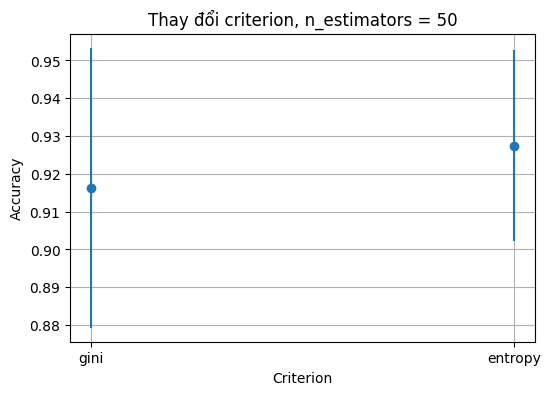

<Figure size 640x480 with 0 Axes>

In [27]:
title = "Thay đổi criterion, n_estimators = 50"
xlabel = "Criterion"
X = []
Y = []
error = []

for criterion in ["gini", "entropy"]:
    print(f"Đang chạy criterion = {criterion} ...")
    text_clf = RandomForestClassifier(criterion=criterion, n_estimators=50)
    mean, std = cross_validation(text_clf, X_tfidf, y_train)
    X.append(criterion)      
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)

plt.savefig('RF_change_criterion.png', bbox_inches='tight')
plt.show()


Đang chạy n_estimators = 10 ...
Đang chạy n_estimators = 50 ...
Đang chạy n_estimators = 100 ...
Đang chạy n_estimators = 300 ...


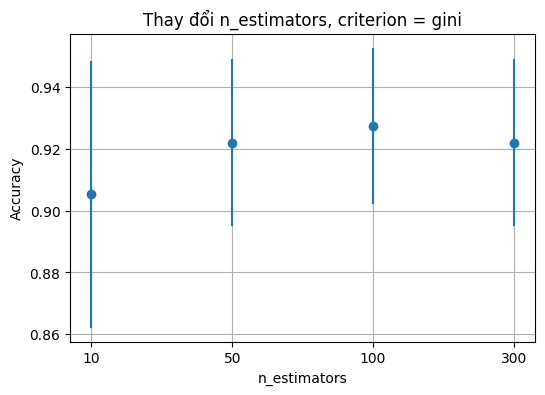

<Figure size 640x480 with 0 Axes>

In [28]:
title = "Thay đổi n_estimators, criterion = gini"
xlabel = "n_estimators"
X = []
Y = []
error = []

for n_estimators in [10, 50, 100, 300]:
    print(f"Đang chạy n_estimators = {n_estimators} ...")
    text_clf = RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    mean, std = cross_validation(text_clf, X_tfidf, y_train)
    X.append(str(n_estimators))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)

plt.savefig('RF_change_N.png', bbox_inches='tight')
plt.show()


Đang chạy K = 1 ...
Đang chạy K = 3 ...
Đang chạy K = 5 ...
Đang chạy K = 20 ...
Đang chạy K = 50 ...


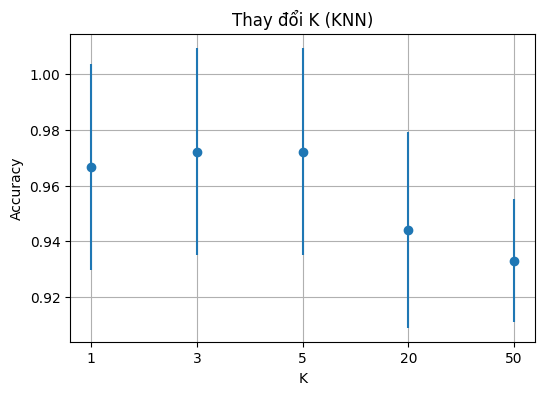

<Figure size 640x480 with 0 Axes>

In [29]:
from sklearn.neighbors import KNeighborsClassifier

title = "Thay đổi K (KNN)"
xlabel = "K"
X = []
Y = []
error = []

for k in [1, 3, 5, 20, 50]:
    print(f"Đang chạy K = {k} ...")
    text_clf = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(text_clf, X_tfidf, y_train)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

plot(title, xlabel, X, Y, error)

plt.savefig('KNN_change_K.png', bbox_inches='tight')
plt.show()


In [30]:
svm_ = svm.SVC(kernel='linear', C=1.0)
rf = RandomForestClassifier(criterion='gini', n_estimators=300)
knn = KNeighborsClassifier(n_neighbors=5)

svm_.fit(X_tfidf, y_train)
rf.fit(X_tfidf, y_train)
knn.fit(X_tfidf, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
X_test_tfidf = model_preprocess.transform(X_test)

In [32]:
print(f'SVM: {accuracy_score(y_test, svm_.predict(X_test_tfidf))}')
print(f'RF: {accuracy_score(y_test, rf.predict(X_test_tfidf))}')
print(f'KNN: {accuracy_score(y_test, knn.predict(X_test_tfidf))}')


SVM: 0.9555555555555556
RF: 0.9333333333333333
KNN: 0.9333333333333333


In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
